<h4>Thesis</h4>
<h6>These models try predict if the score of the home team(principal) is larger than the visitor team, utilizing KNN. <br>The variables X are: "home_odds", "draw_odds", "away_odds"<br>
The variables Y are: "back_draw"</h6>

<h6>When the quantity of the score of the visitor team is equal than the home team(principal) then assign 1 to the field "back_draw". When the quantity of the score of the visitor team is different than of the home team(principal) then assign 0 to field "back_draw".</h6>

<h6>*The secret to increase the hit rate is to choose good variables. The better the variables the higher the hit rate will be.*</h6>

<h5>Import dataset</h5>
<h6>Importing the dataset from file .csv.</h6>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings

pd.set_option("display.min_rows", 200)
pd.set_option("display.max_rows", 600)
pd.set_option("display.max_columns", 100)

# Premier League - England
premier_league_2016_2017 = pd.read_csv("https://www.football-data.co.uk/mmz4281/1617/E0.csv")
premier_league_2017_2018 = pd.read_csv("https://www.football-data.co.uk/mmz4281/1718/E0.csv")
premier_league_2018_2019 = pd.read_csv("https://www.football-data.co.uk/mmz4281/1819/E0.csv")
premier_league_2019_2020 = pd.read_csv("https://www.football-data.co.uk/mmz4281/1920/E0.csv")
premier_league_2020_2021 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2021/E0.csv")
premier_league_2021_2022 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/E0.csv")
premier_league_2022_2023 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2223/E0.csv")

df = pd.concat([premier_league_2016_2017, premier_league_2017_2018, premier_league_2018_2019, premier_league_2019_2020, premier_league_2020_2021, premier_league_2021_2022, premier_league_2022_2023], axis=0, ignore_index=True)
#df = pd.concat([premier_league_2021_2022, premier_league_2022_2023], axis=0, ignore_index=True)
df["League"] = "Premier League"
df = df[["League", "Date", "HomeTeam", "AwayTeam", "B365H", "B365D", "B365A", "FTHG", "FTAG"]]
df.columns = ["league", "date", "home", "away", "home_odds", "draw_odds", "away_odds", "home_goals_ft", "away_goals_ft"]
df = df.astype({"date":"datetime64"})
df.dropna(inplace=True)
df = df.convert_dtypes(infer_objects=True)
df.reset_index(inplace=True, drop=True)
df.tail()

,league,date,home,away,home_odds,draw_odds,away_odds,home_goals_ft,away_goals_ft
2516,Premier League,2023-02-25,Bournemouth,Man City,10.00,5.75,1.29,1,4
2517,Premier League,2023-02-25,Crystal Palace,Liverpool,4.75,3.80,1.73,0,0
2518,Premier League,2023-02-26,Tottenham,Chelsea,2.55,3.25,2.90,2,0
2519,Premier League,2023-01-03,Arsenal,Everton,1.36,4.75,10.00,4,0
2520,Premier League,2023-01-03,Liverpool,Wolves,1.50,4.75,6.00,2,0


<h5>Feature Engineering and Preprocessing</h5>
<h6>When the quantity of the score of the home team(principal) is equal the score of the visitor team then assign 1 to the field "back_draw".When the quantity of the score of the visitor team is different of the home team(principal) then assign 0 to field "back_draw".</h6>

In [2]:
df["sum_odds"] = df["home_odds"] + df["away_odds"] + df["draw_odds"]
df.loc[(df["home_goals_ft"] == df["away_goals_ft"]), "back_draw"] = 1
df.loc[(df["home_goals_ft"] != df["away_goals_ft"]), "back_draw"] = 0
df.tail()

,league,date,home,away,home_odds,draw_odds,away_odds,home_goals_ft,away_goals_ft,sum_odds,back_draw
2516,Premier League,2023-02-25,Bournemouth,Man City,10.00,5.75,1.29,1,4,17.04,0.0
2517,Premier League,2023-02-25,Crystal Palace,Liverpool,4.75,3.80,1.73,0,0,10.28,1.0
2518,Premier League,2023-02-26,Tottenham,Chelsea,2.55,3.25,2.90,2,0,8.70,0.0
2519,Premier League,2023-01-03,Arsenal,Everton,1.36,4.75,10.00,4,0,16.11,0.0
2520,Premier League,2023-01-03,Liverpool,Wolves,1.50,4.75,6.00,2,0,12.25,0.0


<h5>Defining X and Y</h5>

In [3]:
X = df.loc[:, ["home_odds", "draw_odds", "away_odds", "sum_odds"]]
y = df.loc[:, "back_draw"]

<h5>Pre processing (Standard Scaler)</h5>

In [4]:
std = StandardScaler()
X = std.fit_transform(X)

<h5>Split Train and Test</h5>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X)

(1890, 4) (631, 4) (1890,) (631,)
[[-0.2700427  -0.66177466 -0.36279516 -0.59747125]
 [-0.43427547 -0.66177466 -0.0930659  -0.44548986]
 [ 0.05842283 -0.59576425 -0.54621106 -0.58853117]
 ...
 [-0.20845542 -0.69477987 -0.43831935 -0.64217166]
 [-0.69704789  0.2953763   1.09374283  0.6827485 ]
 [-0.63956642  0.2953763   0.23060921 -0.00742584]]


<h5>Train the Model</h5>

In [6]:
knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

<h5>Evaluate the Model</h5>

In [7]:
y_predictions = knn.predict(X_test)

print(f"Accuracy score (training): {knn.score(X_train, y_train)}")
print(f"Accuracy score (validation): {knn.score(X_test, y_test)}\n")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_predictions)}\n")
print(f"Classification Report:\n {classification_report(y_test, y_predictions)}")

Accuracy score (training): 0.7904761904761904
Accuracy score (validation): 0.7496038034865293

Confusion Matrix:
 [[463  25]
 [133  10]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.95      0.85       488
         1.0       0.29      0.07      0.11       143

    accuracy                           0.75       631
   macro avg       0.53      0.51      0.48       631
weighted avg       0.67      0.75      0.69       631



<h5>Informations about model</h5>

In [8]:
print(f"Games that was predicted as been 0 and was 0: {confusion_matrix(y_test, y_predictions)[0][0]}")
print(f"Games that was predicted as been 0 and was 1: {confusion_matrix(y_test, y_predictions)[1][0]}")
print(f"Games that was predicted as been 1 and was 0: {confusion_matrix(y_test, y_predictions)[0][1]}")
print(f"Games that was predicted as been 1 and was 1: {confusion_matrix(y_test, y_predictions)[1][1]}")

test_total_matches = confusion_matrix(y_test, y_predictions)[0][0] + \
                     confusion_matrix(y_test, y_predictions)[0][1] + \
                     confusion_matrix(y_test, y_predictions)[1][0] + \
                     confusion_matrix(y_test, y_predictions)[1][1]

entry_games = confusion_matrix(y_test, y_predictions)[0][1] + confusion_matrix(y_test, y_predictions)[1][1]
entry_tax = (entry_games / test_total_matches) * 100
hit_rate = (confusion_matrix(y_test, y_predictions)[1][1] / entry_games) * 100

print(f"Total Matches: {test_total_matches}")
print(f"Entry Games: {entry_games}")
print(f"Entry Tax: {entry_tax.round(2)}%")
print(f"Hit Rate: {hit_rate.round(2)}%")

Games that was predicted as been 0 and was 0: 463
Games that was predicted as been 0 and was 1: 133
Games that was predicted as been 1 and was 0: 25
Games that was predicted as been 1 and was 1: 10
Total Matches: 631
Entry Games: 35
Entry Tax: 5.55%
Hit Rate: 28.57%


<h5>Prevision / Probabilities of classification</h5>

In [9]:
knn = KNeighborsClassifier(n_neighbors=3, metric="minkowski", p=2)
knn.fit(X, y)
predict_probability = knn.predict_proba(X)
df["predictions"] = y_predictions = knn.predict(X)
df["probability_0"] = predict_probability[:, 0].round(2)
df["probability_1"] = predict_probability[:, 1].round(2)
df.tail()

,league,date,home,away,home_odds,draw_odds,away_odds,home_goals_ft,away_goals_ft,sum_odds,back_draw,predictions,probability_0,probability_1
2516,Premier League,2023-02-25,Bournemouth,Man City,10.00,5.75,1.29,1,4,17.04,0.0,0.0,1.00,0.00
2517,Premier League,2023-02-25,Crystal Palace,Liverpool,4.75,3.80,1.73,0,0,10.28,1.0,1.0,0.00,1.00
2518,Premier League,2023-02-26,Tottenham,Chelsea,2.55,3.25,2.90,2,0,8.70,0.0,1.0,0.33,0.67
2519,Premier League,2023-01-03,Arsenal,Everton,1.36,4.75,10.00,4,0,16.11,0.0,0.0,1.00,0.00
2520,Premier League,2023-01-03,Liverpool,Wolves,1.50,4.75,6.00,2,0,12.25,0.0,0.0,1.00,0.00


<h5>Backtest</h5>

In [10]:
stake = 1
win_back = stake * (df["draw_odds"] - 1)
lose_back = -stake

df.loc[(df["predictions"] == 1) & (df["back_draw"] == 1), "profit"] = win_back
df.loc[(df["predictions"] == 1) & (df["back_draw"] == 0), "profit"] = lose_back
df.loc[(df["predictions"] == 0) & (df["back_draw"] == 1), "profit"] = 0
df.loc[(df["predictions"] == 0) & (df["back_draw"] == 1), "profit"] = 0

df = df[df["predictions"] == 1]
df["profit_accumulated"] = df["profit"].cumsum()
df.tail(20)

,league,date,home,away,home_odds,draw_odds,away_odds,home_goals_ft,away_goals_ft,sum_odds,back_draw,predictions,probability_0,probability_1,profit,profit_accumulated
2380,Premier League,2022-10-19,Brentford,Chelsea,4.75,3.80,1.72,0,0,10.27,1.0,1.0,0.00,1.00,2.80,484.46
2391,Premier League,2022-10-23,Leeds,Fulham,2.05,3.50,3.60,2,3,9.15,0.0,1.0,0.33,0.67,-1.00,483.46
2398,Premier League,2022-10-29,Brentford,Wolves,2.20,3.40,3.30,1,1,8.90,1.0,1.0,0.33,0.67,2.40,485.86
2400,Premier League,2022-10-29,Crystal Palace,Southampton,1.90,3.60,4.00,1,0,9.50,0.0,1.0,0.33,0.67,-1.00,484.86
2421,Premier League,2022-12-11,West Ham,Leicester,2.05,3.40,3.75,0,2,9.20,0.0,1.0,0.33,0.67,-1.00,483.86
2423,Premier League,2022-12-11,Wolves,Arsenal,6.00,4.20,1.55,0,2,11.75,0.0,1.0,0.33,0.67,-1.00,482.86
2452,Premier League,2023-04-01,Leeds,West Ham,2.60,3.50,2.60,2,2,8.70,1.0,1.0,0.33,0.67,2.50,485.36
2455,Premier League,2023-05-01,Chelsea,Man City,5.00,4.00,1.67,0,1,10.67,0.0,1.0,0.33,0.67,-1.00,484.36
2457,Premier League,2023-01-13,Aston Villa,Leeds,1.91,3.60,4.00,2,1,9.51,0.0,1.0,0.33,0.67,-1.00,483.36
2467,Premier League,2023-01-18,Crystal Palace,Man United,4.50,3.60,1.80,1,1,9.90,1.0,1.0,0.33,0.67,2.60,485.96


<h5>Plot Backtest</h5>

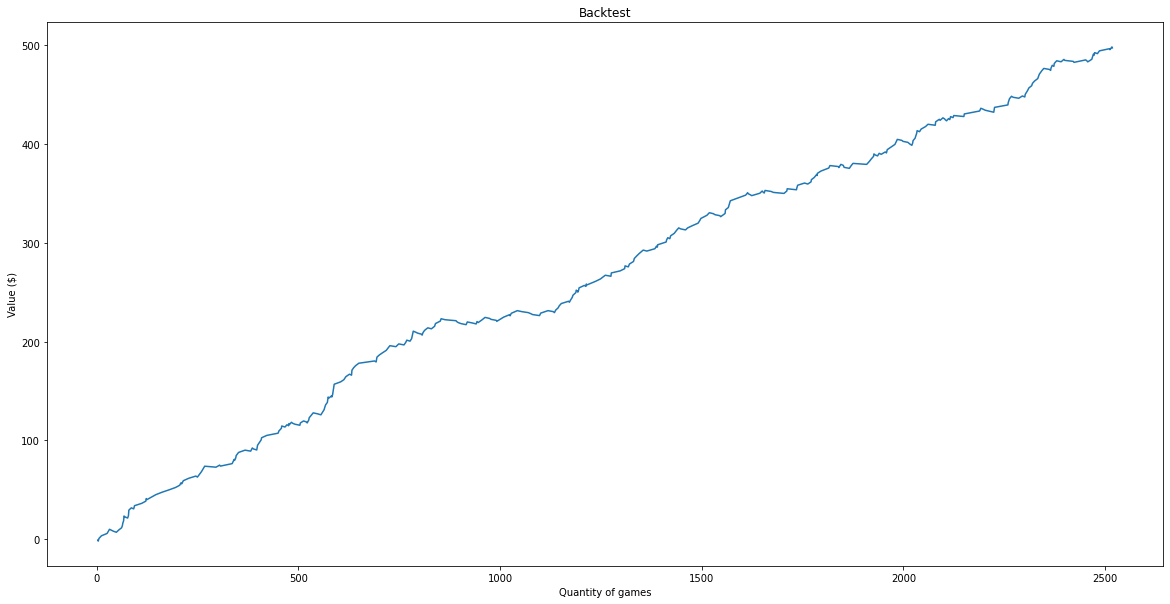

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(df["profit_accumulated"])
plt.xlabel("Quantity of games")
plt.ylabel("Value ($)")
plt.title("Backtest")
plt.show()